# set up


**setting up the js src in browser console **


```
var script = document.createElement('script');
script.src = "https://ajax.googleapis.com/ajax/libs/jquery/2.2.0/jquery.min.js"; document.getElementsByTagName('head')[0].appendChild(script);

```

**parsing the urls **

```
var urls = $('.rg_di .rg_meta').map(function() { return JSON.parse($(this).text()).ou; });

```


**Saving the parsed urls and downloads **


```
var textToSave = urls.toArray().join('\n');
var hiddenElement = document.createElement('a');
hiddenElement.href = 'data:attachment/text,' + encodeURI(textToSave);
hiddenElement.target = '_blank';
hiddenElement.download = 'urls.txt';
hiddenElement.click();
```

In [0]:
!mkdir rose

In [0]:
!rm -r rose

# Download images using python

In [0]:
from imutils import paths
import requests
import cv2
import os

In [0]:
rose_file_path = "urls.txt"
not_rose_file_path = "nr.txt"

op_rose_file_path = "rose/"
op_nt_rose_file_path = "not_rose/"

In [0]:
rows = open(rose_file_path).read().strip().split("\n")
total = 0

In [6]:
type(rows)

list

In [7]:
rows[:5]

['https://i.ytimg.com/vi/DFhJUk7LNT0/hqdefault.jpg',
 'https://images.unsplash.com/photo-1519058497187-7167f17c6daf?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&w=1000&q=80',
 'https://images-na.ssl-images-amazon.com/images/I/71etj1mmV9L._SX425_.jpg',
 'https://s3.amazonaws.com/site-files-prod/FiftyFlowers/Image/Product/Hot-Lady2-350_de950408.jpg',
 'https://s3.amazonaws.com/store-product-images/JGI169-M.jpg']

In [0]:
# downloding the images
for url in rows:
    try:
        # requesting image
        r = requests.get(url, timeout=60)
        
        # saving image
        p = os.path.join('rose', '{}.jpg'.format(total))
        with open(p, "wb") as f:
            f.write(r.content)
            
        # try to read using opencv
        try:
            image = cv2.imread(p)
            if image is None:
                os.remove(p)
            else:
                total += 1
        except:
            os.remove(p) # when image is corrupt delete directly
    except:
        print("download error ... skipping {}".format(p))

download error ... skipping rose/79.jpg
download error ... skipping rose/83.jpg
download error ... skipping rose/84.jpg
download error ... skipping rose/85.jpg
download error ... skipping rose/86.jpg


In [9]:
!unzip rose.zip -d rose/

Archive:  rose.zip
   creating: rose/rose/
  inflating: rose/rose/0.jpg         
  inflating: rose/rose/1.jpg         
  inflating: rose/rose/2.jpg         
  inflating: rose/rose/3.jpg         
  inflating: rose/rose/4.jpg         
  inflating: rose/rose/5.jpg         
  inflating: rose/rose/6.jpg         
  inflating: rose/rose/7.jpg         
  inflating: rose/rose/8.jpg         
  inflating: rose/rose/9.jpg         
  inflating: rose/rose/10.jpg        
  inflating: rose/rose/11.jpg        
  inflating: rose/rose/12.jpg        
  inflating: rose/rose/13.jpg        
  inflating: rose/rose/14.jpg        
  inflating: rose/rose/15.jpg        
  inflating: rose/rose/16.jpg        
  inflating: rose/rose/17.jpg        
  inflating: rose/rose/18.jpg        
  inflating: rose/rose/19.jpg        
  inflating: rose/rose/20.jpg        
  inflating: rose/rose/21.jpg        
  inflating: rose/rose/22.jpg        
  inflating: rose/rose/23.jpg        
  inflating: rose/rose/24.jpg        
  infla

In [20]:
!unzip not_rose.zip -d rose/

Archive:  not_rose.zip
   creating: rose/not_rose/
  inflating: rose/not_rose/0.jpg     
  inflating: rose/not_rose/1.jpg     
  inflating: rose/not_rose/2.jpg     
  inflating: rose/not_rose/3.jpg     
  inflating: rose/not_rose/4.jpg     
  inflating: rose/not_rose/5.jpg     
  inflating: rose/not_rose/8.jpg     
  inflating: rose/not_rose/9.jpg     
  inflating: rose/not_rose/10.jpg    
  inflating: rose/not_rose/11.jpg    
  inflating: rose/not_rose/12.jpg    
  inflating: rose/not_rose/13.jpg    
  inflating: rose/not_rose/14.jpg    
  inflating: rose/not_rose/15.jpg    
  inflating: rose/not_rose/16.jpg    
  inflating: rose/not_rose/17.jpg    
  inflating: rose/not_rose/18.jpg    
  inflating: rose/not_rose/19.jpg    
  inflating: rose/not_rose/20.jpg    
  inflating: rose/not_rose/21.jpg    
  inflating: rose/not_rose/22.jpg    
  inflating: rose/not_rose/23.jpg    
  inflating: rose/not_rose/24.jpg    
  inflating: rose/not_rose/25.jpg    
  inflating: rose/not_rose/26.jpg    

# Using keras

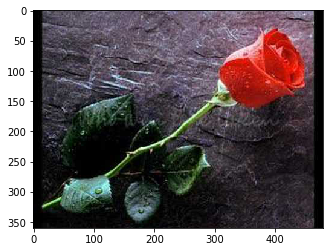

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img = mpimg.imread('rose/rose/0.jpg')
imgplot = plt.imshow(img)
plt.show()

In [13]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K

Using TensorFlow backend.


In [0]:
import matplotlib
matplotlib.use("Agg")

from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os

In [0]:
class LeNet:
  @staticmethod
  def build(width, height, depth, classes):
    inputShape = (height, width, depth)
    
    if K.image_data_format() == "channels_first":
      inputShape = (depth, height, width)
    
    model = Sequential()
    
    # first block of conv -> activation -> maxpool
    model.add(Conv2D(20, (5, 5), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # second block of conv -> activation -> maxpool
    model.add(Conv2D(50, (5, 5), padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    # FC layer
    model.add(Flatten())
    model.add(Dense(500))
    model.add(Activation("relu"))
    
    # Classifier layer
    model.add(Dense(classes))
    model.add(Activation("softmax"))
    
    return model

In [0]:
epochs = 25 # epochs
init_lr = 1e-3 # learning rate
batch_size = 32 # batch_size

In [0]:
data = []
labels = []

In [25]:
image_paths = sorted(list(paths.list_images('rose/')))
image_paths[:5], image_paths[-5:]

(['rose/not_rose/0.jpg',
  'rose/not_rose/1.jpg',
  'rose/not_rose/10.jpg',
  'rose/not_rose/100.jpg',
  'rose/not_rose/101.jpg'],
 ['rose/rose/95.jpg',
  'rose/rose/96.jpg',
  'rose/rose/97.jpg',
  'rose/rose/98.jpg',
  'rose/rose/99.jpg'])

In [0]:
random.seed(0)
random.shuffle(image_paths)

In [28]:
image_paths[-1].split(os.path.sep)[-2]

'rose'

In [0]:
for image_path in image_paths:
  image = cv2.imread(image_path)
  image = cv2.resize(image, (28, 28))
  image = img_to_array(image)
  data.append(image)
  
  label = image_path.split(os.path.sep)[-2]
  label = 1 if label == 'rose' else 0
  labels.append(label)

In [32]:
len(data), len(labels)

(660, 660)

In [33]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

data.shape, labels.shape

((660, 28, 28, 3), (660,))

In [51]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((495, 28, 28, 3), (165, 28, 28, 3), (495,), (165,))

In [52]:
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

y_train.shape, y_test.shape

((495, 2), (165, 2))

In [0]:
# data augmentation
aug = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

In [38]:
model = LeNet.build(width=28, height=28, depth=3, classes=2)
opt = Adam(lr=init_lr, decay=init_lr/epochs)

Instructions for updating:
Colocations handled automatically by placer.


In [39]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17284112998099440745
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 5980707516349752068
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 3788344171694603363
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11276946637
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4023007285654762305
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [40]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:
# import tensorflow as tf
# import keras


# config = tf.ConfigProto( device_count = {'GPU': 2 , 'CPU': 2} ) 
# sess = tf.Session(config=config) 
# keras.backend.set_session(sess)

In [0]:
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

In [44]:
model

In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 20)        1520      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)              0         
__________

In [53]:
# training model
H = model.fit_generator(
    aug.flow(
        x_train,
        y_train,
        batch_size=batch_size
    ),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // batch_size,
    epochs=epochs,
    verbose=2
)

Epoch 1/25


FailedPreconditionError: ignored

In [49]:
y_test.shape, y_train.shape

((165, 2), (495, 2, 2))